**Test Attacks Against MNIST KNN**

In [4]:
import sys
import os

In [5]:
import numpy as np

In [6]:
import mnist_test_gear

In [9]:
X_train, y_train, X_test, y_test = mnist_test_gear.get_mnist_sets(p=0, as_float=True)

train size=60000, test size=10000


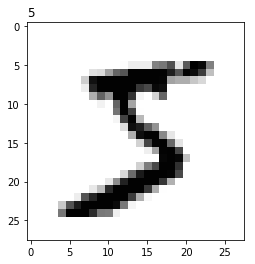

In [12]:
mnist_test_gear.plot_flatten_img(X_train[0], y_train[0])

In [13]:
from sklearn.neighbors import \
    KNeighborsClassifier

knn = KNeighborsClassifier(
    algorithm='kd_tree', leaf_size=30, metric='euclidean',
    metric_params=None, n_jobs=4, n_neighbors=5, p=2,
    weights='distance'
)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='distance')

In [16]:
knn.score(X_test, y_test)

0.96909999999999996

In [17]:
import noise_utils

def apply_noise(noise, x, **kwargs):
    return noise(x.reshape(mnist_test_gear.img_shape), **kwargs).flatten()

In [25]:
Xn_test = np.array(list(
    map(lambda x: apply_noise(noise_utils.white_noise, x, sigma=.8), X_test)
))

In [26]:
knn.score(Xn_test[:100], y_test[:100])

0.94999999999999996

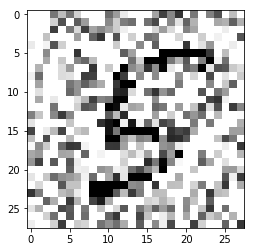

In [27]:
mnist_test_gear.plot_flatten_img(Xn_test[23])